
    ------------------------------------------------------------
                              Welcome!
    1. Adjusted price per day
    2. Return
    3. SMA
    4. Portfolio Optimization
    5. Fund allocation
    6. Monte Carlo - Price change
    7. Monte Carlo - Weight change
    8. All of the above
    9. Exit
    ------------------------------------------------------------
     8
Enter tickers:tt
Enter how many years ago: 5
Is the proportion of portfolio equally distrubited? y

Please enter the amount of fund you would like invest into the portfolio: 
100000


,LMT,AAPL,MSFT,MGM,BA
2016-04-28,204.383728,22.050558,45.756889,20.177889,122.011871
2016-04-29,204.085144,21.797100,45.729378,20.130636,122.011871
2016-05-02,204.840424,21.773848,46.407951,20.480328,121.296791
2016-05-03,206.122620,22.131937,45.646847,20.262953,119.921021
2016-05-04,207.273132,21.901741,45.729378,20.291300,118.472816
...,...,...,...,...,...
2021-04-20,387.329987,133.110001,258.260010,39.549999,234.059998
2021-04-21,387.239990,133.500000,260.579987,41.200001,235.919998
2021-04-22,380.089996,131.940002,257.170013,40.750000,234.330002
2021-04-23,377.290009,134.320007,261.149994,41.509998,238.380005




Processing



Adjusted close


The average per stock is 

LMT      0.749055
AAPL     2.038742
MSFT     1.931677
MGM      1.362960
BA       1.210811
^GSPC    0.793916
dtype: float64.


Portfolio return



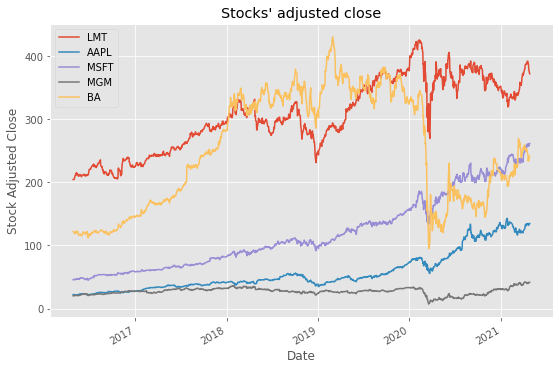

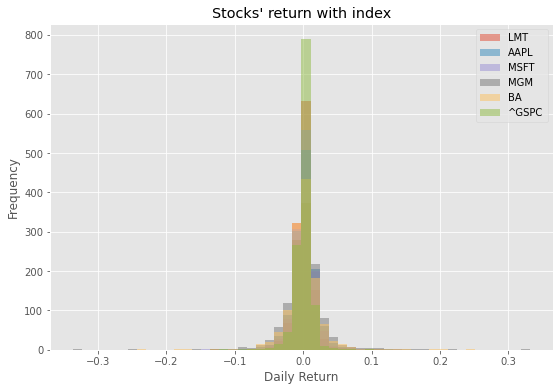



Simple Moving Average 50 vs 200 days


The portfolio's expected return is 1.45865, compare to the index 0.79392, the variance is 0.66473.
The sigma for the portfolio is 0.01725.


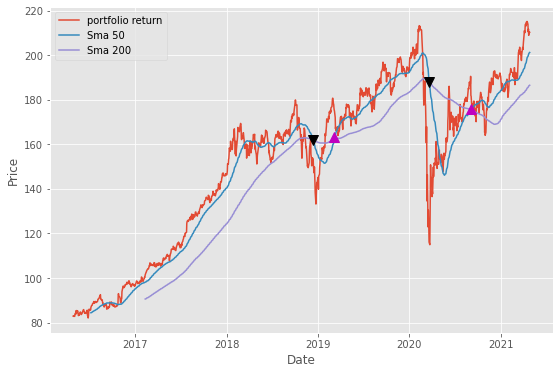



Maximized portfolio's weight



,Optimized Portfolio Proportion
AAPL,39.83%
MSFT,60.17%


Expected annual return: 42.6%
Annual volatility: 26.5%
Sharpe Ratio: 1.53
The total numbers of stock for portfolio is 2.


Fund allocation



Discrete allocation in share(s) 
 Latest Prices 
 Allocated fund 
 
 
 
 
 AAPL 
 295.0 
 134.72 
 39742.4 
 
 
 MSFT 
 230.0 
 261.55 
 60156.5 
 
 
 Total 
 525.0 
 396.27 
 99898.9 
 
 
 
 
 
 
 Fund in USD 
 
 
 
 
 Invested amount 
 100000.0 
 
 
 Allocated amount 
 99898.9 
 
 
 Funds remaining 
 101.1



Monte Carlo Simulation - Price as changing variables

Annual returns: 0.78


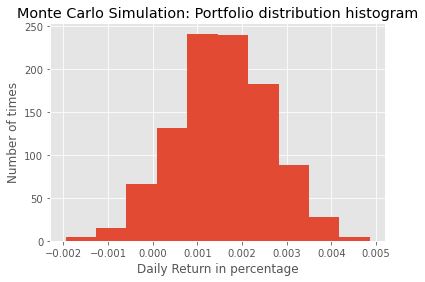



Monte Carlo Simulation - Weight as changing variables

The portfolio for max Sharpe Ratio:
 ret       0.001573
stdev     0.016712
sharpe    0.094117
AAPL      0.409171
MSFT      0.590829
Name: 767, dtype: float64

The portfolio for min risk:
 ret       0.001566
stdev     0.016675
sharpe    0.093910
AAPL      0.328132
MSFT      0.671868
Name: 1306, dtype: float64


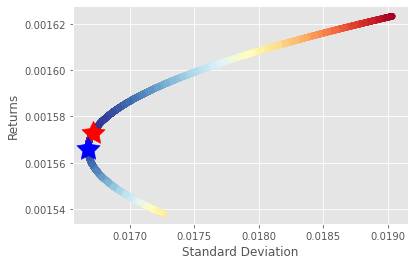



Adjusted close - Optimized portfolio 


The average per stock is 

AAPL                     2.038742
MSFT                     1.931677
Weighted daily return    1.936899
dtype: float64.


Optimized portfolio return



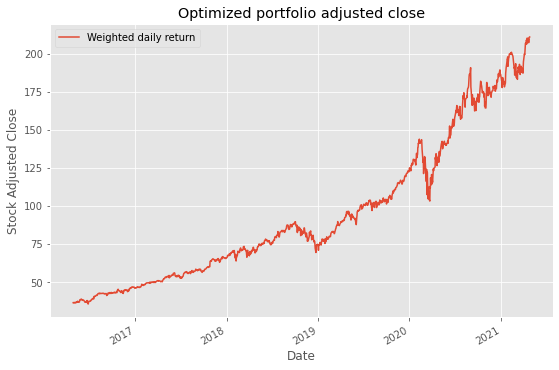

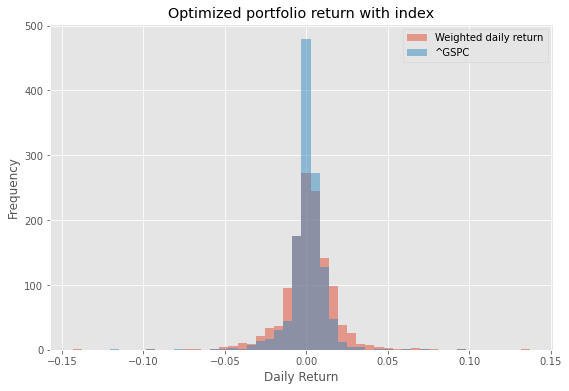



Simple Moving Average 50 vs 200 days - Optimized portfolio


The portfolio's expected return is 1.936899, compare to the index 0.79392, the variance is 0.66473.
The sigma for the portfolio is 0.016727.


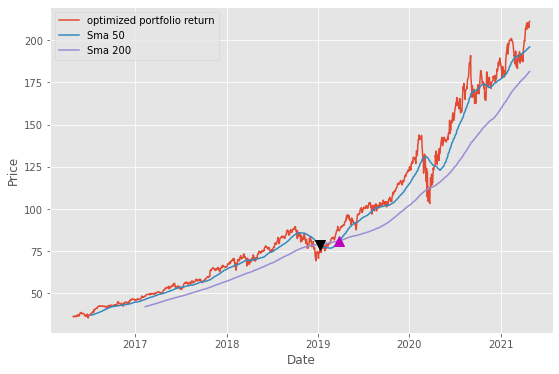

In [1]:
"""
Problem to solve: 
1. all ratios (sharp,treynor)
2. plt density?
3. GUI?
4. change all graphs to interactive
5. Add puLp function - to maximize
6. Allow user to chose which index to compare
7. Allow user to chose number of the simulation runs
8. Allow user to change the rRF??
9. Add on all adjustment for S&P 500
    the constrain and the loop 
        choosing option for it
10. Transfer this to ios app         
"""

### objective: Analyzed the profit of the stock portfolio and visualized it 

### Import and Settings ###

import matplotlib.pyplot as plt
import bt
import datetime as dt
import statistics as stat
import pandas as pd
import numpy as np
import copy
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.dates as mdates
import sys
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from IPython.display import display_html
from sklearn import preprocessing
from matplotlib import style
import pandas_datareader as web
from tqdm import tqdm
#%matplotlib inline
#%matplotlib widget

style.use('ggplot')

# Assign brench mark for portfolio
SP500 = ["^GSPC"]
DW = ["^DJI"]
HSI = ["^HSI"]

# Risk-free rate
rRF = 0.02

# set response for question euqal distribute
yes = ["y","yes","why not","sure", "sure thing", "sure thing","may be","ok","okey","okay","yess","yesss"]
my_portfolio = ["0003.HK","0405.HK","0939.HK","1038.HK","1299.HK"]
S_P_500 = ['S&P 500','S_P 500','SP500']
testing = ["LMT","AAPL","MSFT","MGM","BA"]

# table formatting
format_dict = {
    'Portfolio Optimized Proportion': '{:.1%}'
}

# Display table side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True) 


### welcome page ###
def menu():
    ans = input(prompt = f"""
    {'-' * 60}
                              Welcome!
    1. Adjusted price per day
    2. Return
    3. SMA
    4. Portfolio Optimization
    5. Fund allocation
    6. Monte Carlo - Price change
    7. Monte Carlo - Weight change
    8. All of the above
    9. Exit
    {'-' * 60}
     """)
    while True:
        if ans == '1':
            ask_for_input()
            adj_price()
            print('\n\n\033[01mProcessing\033[0m\n')
            show_adj_price_per_day()
            break
        elif ans == '2':
            ask_for_input()
            adj_price()
            print('\n\n\033[01mProcessing\033[0m\n')
            show_portfolio_return()
            break
        elif ans == '3':
            ask_for_input()
            adj_price()
            print('\n\n\033[01mProcessing\033[0m\n')
            daily_index_return()
            daily_portfolio_return()
            SMA()
            show_sma()
            break
        elif ans == '4':
            ask_for_input()
            adj_price()
            print('\n\n\033[01mProcessing\033[0m\n')
            port_max()
            show_port_max()
            break 
        elif ans == '5':
            ask_for_input()
            adj_price()
            print('\n\n\033[01mProcessing\033[0m\n')
            port_max()
            fund_allocation()
            show_fund_allocation()
            break
        elif ans == '6':
            ask_for_input()
            adj_price()
            print('\n\n\033[01mProcessing\033[0m\n')
            port_max()
            MC_price_change()
            show_MC_price_change()
            break
        elif ans == '7':
            ask_for_input()
            adj_price()
            print('\n\n\033[01mProcessing\033[0m\n')
            port_max()
            MC_weight_change()
            show_MC_weight_change()
            break
        elif ans == '8':
            ask_for_input()
            adj_price()
            print('\n\n\033[01mProcessing\033[0m\n')
            daily_index_return()
            daily_portfolio_return()
            SMA()
            port_max()
            fund_allocation()
            MC_price_change()
            MC_weight_change()
            after_mc_daily_index_return()
            after_mc_show_portfolio_return()
            after_mc_sma()
            print('\n\n\033[01mAdjusted close\033[0m\n')
            show_adj_price_per_day()
            print('\n\n\033[01mPortfolio return\033[0m\n')
            show_portfolio_return()
            print('\n\n\033[01mSimple Moving Average 50 vs 200 days\033[0m\n')
            show_sma()
            print("\n\n\033[01mMaximized portfolio's weight\033[0m\n")
            show_port_max()
            print('\n\n\033[01mFund allocation\n')
            show_fund_allocation()
            print('\n\n\033[01mMonte Carlo Simulation - Price as changing variables\033[0m\n')
            show_MC_price_change()
            print('\n\n\033[01mMonte Carlo Simulation - Weight as changing variables\033[0m\n')
            show_MC_weight_change()
            print('\n\n\033[01mAdjusted close - Optimized portfolio \033[0m\n')
            show_after_mc_daily_index_return()
            print('\n\n\033[01mOptimized portfolio return\033[0m\n')
            show_after_mc_show_portfolio_return()
            print('\n\n\033[01mSimple Moving Average 50 vs 200 days - Optimized portfolio\033[0m\n')
            show_after_mc_sma()
            break
        elif ans == '9':
            sys.exit(0)
        else:
            print(f'''\n    The system could NOT recognize the input. 
    Please \033[1mre-enter\033[0m. ''')
            menu()
            break

### ask for input ###

def ask_for_input():
    # ask for tickers and split them with comma and into list
    global tickers_lst
    tickers_name = input("Enter tickers:").upper()
    if tickers_name == "MP":
        tickers_lst = my_portfolio
    elif tickers_name == "TT":
        tickers_lst = testing
    elif tickers_name in S_P_500:
        S_P_500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
        S_P_500_table_df = S_P_500_table[0]
        stock_portfolio = S_P_500_table_df.iloc[:,0]
        stock_portfolio.replace('\.','-', regex=True,inplace=True)
        S_P_500_table_df['Symbol']= stock_portfolio
        tickers_lst = stock_portfolio
    else:
        tickers_lst = []
        tickers_lst = tickers_name.split(",")
    
    global tickers_lst_w_index
    # add brench mark to the tickers_lst
    if tickers_name == "MP":
        tickers_lst_w_index = copy.deepcopy(tickers_lst)
        tickers_lst_w_index.extend(HSI)
    elif tickers_name in S_P_500:
        tickers_lst_w_index = copy.deepcopy(tickers_lst)
        tickers_lst_w_index.extend(DW)
    else:
        tickers_lst_w_index = copy.deepcopy(tickers_lst)
        tickers_lst_w_index.extend(SP500)


    # ask for date/year input
    global years_ago
    global amount_of_fund
    years_ago = float(input("Enter how many years ago: "))

    # Ask for is the portfolio equally distributed
    equal_distributed = input("Is the proportion of portfolio equally distrubited? ").lower()
    # divide "1" by the count of tickers and store in proportion per list if the answer is yes
    global proportion_per_lst
    if equal_distributed in yes:
        proportion_per_lst = []
        for ticker in range (0,len(tickers_lst)):
            proportion_percentage = 1/len(tickers_lst)
            proportion_per_lst.append(proportion_percentage)
    else:
        portfolio_percentage = input("Please enter the percentage of each stock: ")
        proportion_per_lst = []
        proportion_per_lst = portfolio_percentage.split(",")         
        # change the proportion from string to float one by one
        proportion_per_lst = [float(proportion) for proportion in proportion_per_lst]
        remain_chance = 3
        while remain_chance >=0:
            # determine if the input numbers are in decimal or percentage format, and if all stocks' proportion are allocated
            if len(tickers_lst) == len(proportion_per_lst) and sum(proportion_per_lst) == 1:
                pass
                break
            elif len(tickers_lst) == len(proportion_per_lst) and sum(proportion_per_lst) == 100:
                # Convert all percentage into deciamls by dividing 100, and del. the original percentages in the list
                for proportion in range(0,len(tickers_lst)):
                    proportion_percentage = proportion_per_lst[proportion]/100
                    proportion_per_lst.append(proportion_percentage)   
                del proportion_per_lst [0:len(tickers_lst)]
                break
            elif remain_chance == 0:
                sys.exit(0)
            else:
                # 
                print(f"""Please re-enter the percentage\nYou have \033[01m{remain_chance}\033[0m chances before the program ends""")
                portfolio_percentage = input("Please enter the percentage of each stock: ")
                proportion_per_lst = []
                proportion_per_lst = portfolio_percentage.split(",")         
                proportion_per_lst = [float(proportion) for proportion in proportion_per_lst]
                remain_chance = remain_chance -1

    amount_of_fund = float(input("\nPlease enter the \033[01mamount of fund\033[0m you would like \033[01minvest\033[0m into the portfolio: \n"))


### get data & data prep ###

def adj_price():
    # calculate the beginning date and the end date
    today = dt.date.today()
    date = today-dt.timedelta(days=years_ago*365)

    #def stock_return():
    global adj_price_w_index
    global stock_return_w_index
    adj_price_w_index = pd.DataFrame(columns=tickers_lst_w_index)
    for ticker in tqdm(tickers_lst_w_index, desc = 'Downloading data'):
        adj_price_w_index.loc[:,ticker] = web.get_data_yahoo(ticker, start = date, end = today)['Adj Close']
    stock_return_w_index = adj_price_w_index.pct_change()
    
    global adj_price_wo_index 
    global stock_return_wo_index
    # get the adjusted pricing of the stocks within the period
    adj_price_wo_index = adj_price_w_index.iloc[:,:-1]
    #display(adj_price_wo_index) - show all stocks historical price
    # calculate the return/pertcentage change of the adjusted price per day
    stock_return_wo_index = adj_price_wo_index.pct_change()
    
    # sum of index's return
    global index_return
    global index_lst
    index_lst = stock_return_w_index.sum(axis = 0)
    index_return = index_lst.iloc[-1:]

    
### Calculation ###
    
def daily_index_return(): # This is the daily porfolio return in stock price
    global portfolio_mean_adj_close_df
    # Calculate the daily portfolio return
    portfolio_mean_adj_close_df = df([sum(row*proportion_per_lst)for index, row in adj_price_wo_index.iterrows()], \
                                     index = stock_return_wo_index.index, columns = ['Weighted daily return'])

    
def daily_portfolio_return(): # This should be the daily porfolio return in adjusted price in percentage
    global portfolio_mean_df
    portfolio_mean_df = df([sum(row*proportion_per_lst)for index, row in stock_return_wo_index.iterrows()], \
                           index = stock_return_wo_index.index, columns = ['Weighted daily return'])

    global portfolio_mean
    global variance
    # sum the day by day portfolio return into all years
    portfolio_mean = portfolio_mean_df.sum(axis = 0)
    variance = portfolio_mean[0] - index_return[0]
    
    global portfolio_std
    portfolio_std = np.std(portfolio_mean_df)


def SMA():
    # I have no idea what is happening on the position and positions df. Why changing position = channgin positions.
    # And most importantly, if the below showing plot part uses position all will become zero.
    global sma_50
    global sma_200
    global positions
    sma_50 = portfolio_mean_adj_close_df.rolling(window = 50).mean()
    sma_200 = portfolio_mean_adj_close_df.rolling(window = 200).mean()
    signal = np.where(sma_50 > sma_200,1.0,0.0)
    positions = np.diff(signal, axis = 0)
    positions = np.insert(positions, 0, np.nan)
    position = pd.DataFrame(positions, index = sma_200.index)
    position.loc[sma_50[positions == 1.0].index[0]] = 0

    
def beta():
    covariance_lst = (stock_return_wo_index.iloc[1:].mean()).cov
    #weights = np.array(proportion_per_lst)
    #covariance = [sum(row*proportion_per_lst)for index, row in covariance_lst.iterrows()]
    #covariance = covariance_lst * proportion_per_lst
    #covariance = np.dot(covariance_lst, proportion_per_lst)
    variance = np.var(portfolio_mean_df)
    #print(covariance_lst)
    #print(variance)
    
def port_max():
    global cleaned_weights
    global ef
    global opt_weight
    global opt_weight_tbl
    global cleaned_weights_copy
    global cleaned_weights_copy_copy
    
    mu = expected_returns.mean_historical_return(adj_price_wo_index)
    S = risk_models.sample_cov(adj_price_wo_index)

    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    opt_weight = []
    opt_ticker = []
    for key, value in cleaned_weights.items():
        if value > 0:
            opt_weight.append(value)
            opt_ticker.append(key)
        else:
            pass  

    opt_weight_tbl = df(pd.Series(["{0:.2f}%".format(val * 100) for val in opt_weight], \
                          index = opt_ticker), columns = ['Optimized Portfolio Proportion'])
    opt_weight = df(opt_weight, index = opt_ticker, columns = ['Optimized Portfolio Proportion'])
    
    cleaned_weights_copy = cleaned_weights.copy()
    cleaned_weights_copy_copy = cleaned_weights_copy.copy()

def fund_allocation():
    global amount_of_fund
    global allocation, leftover
    global distribution_df
    
    for ticker in cleaned_weights_copy:
        if ticker not in opt_weight_tbl.index:
            cleaned_weights_copy_copy.pop(ticker)
        else:
            pass
    cleaned_weights = cleaned_weights_copy_copy    


    #amount_of_fund = float(input("\nPlease enter the \033[01mamount of fund\033[0m you would like \033[01minvest\033[0m into the portfolio: \n"))
    latest_prices = get_latest_prices(adj_price_wo_index)


    da = DiscreteAllocation(cleaned_weights, latest_prices[cleaned_weights], total_portfolio_value=amount_of_fund)
    allocation, leftover = da.lp_portfolio()
    
    allocated_amount = round(amount_of_fund-leftover,2)
    allocation = pd.DataFrame.from_dict(allocation, orient='index', columns = ['Discrete allocation in share(s)'])
    allocation['Latest Prices'] = round(latest_prices,2)
    allocation['Allocated fund'] = round(allocation['Discrete allocation in share(s)'] * latest_prices,2)
    allocation.loc['Total',:] = allocation.sum(axis=0)

    distribution = [amount_of_fund, allocated_amount, round(leftover,2)]
    distribution_df = pd.DataFrame(distribution, columns = ['Fund in USD'], \
                                   index = ['Invested amount','Allocated amount','Funds remaining'])
    
def MC_price_change():
    global simulation_df_copy
    global simulation_df
    global last_price
    
    # Monte Carlo Simulation - Stock price as changing variables
    prices = adj_price_wo_index.loc[:,allocation.iloc[:-1,].index]
    returns = prices.pct_change()

    weighted_return = np.sum(prices * opt_weight.iloc[:,0], axis =1)
    weighted_return_per = weighted_return.pct_change()

    last_price = weighted_return[-1]

    #Number of Simulations
    num_simulations = 1000
    num_days = 252

    simulation_df = pd.DataFrame()

    for x in range(num_simulations):
        count = 0
        daily_vol = weighted_return_per.std()
        weighted_return_mean = weighted_return_per.mean()

        price_series = []

        price = last_price * (1 + np.random.normal(weighted_return_mean, daily_vol))
        price_series.append(price)

        for y in range(num_days):
            if count == 251:
                break
            price = price_series[count] * (1 + np.random.normal(weighted_return_mean, daily_vol))
            price_series.append(price)
            count += 1

        simulation_df[x] = price_series
        
        
  
    simulation_df_copy = simulation_df.copy()
    
    
    
def MC_weight_change():
    global sim_frame
    global max_sharpe
    global min_std
        # Monte Carlo Simulation - Weights as changing variables
    mean_returns = stock_return_wo_index.loc[:,opt_weight_tbl.index].mean()
    covariance = stock_return_wo_index.loc[:,opt_weight_tbl.index].cov()

    #Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
    num_iterations = 10000
    simulation_res = np.zeros((4+len(opt_weight_tbl.index)-1,num_iterations))

    for i in range(num_iterations):
        #Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(len(opt_weight_tbl.index)))
        weights /= np.sum(weights) 
        #Calculate the return and standard deviation for every step
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(covariance, weights)))
        #Store all the results in a defined array
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev
        #Calculate Sharpe ratio and store it in the array
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        #Save the weights in the array
        for j in range(len(weights)):
            simulation_res[j+3,i] = weights[j]
        sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe'] + \
                                 [opt_weight_tbl.index[no] for no in range(len(opt_weight_tbl.index))]) 
        #Spot the position of the portfolio with highest Sharpe Ratio
        max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
        #Spot the position of the portfolio with minimum Standard Deviation
        min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
        
        
        
def after_mc_daily_index_return(): 
    global after_mc_portfolio_mean_adj_close_df
    global after_mc_index_lst
    global after_mc_portfolio_std
    # Calculate the daily portfolio return
    after_mc_portfolio_mean_adj_close_df = df([sum(row*opt_weight.iloc[:,0])for index, row in adj_price_wo_index[opt_weight.index].iterrows()],
                                              index = stock_return_wo_index.index, columns = ['Weighted daily return'])        
    #after_mc_portfolio_mean_adj_close_df.loc[:,stock_return_w_index.columns[-1]] = adj_price_w_index.iloc[:,-1]
    #display(after_mc_portfolio_mean_adj_close_df)
    #print(round(after_mc_portfolio_mean_adj_close_df.pct_change().sum(axis = 0),6))
    after_mc_index_lst = index_lst[opt_weight.index]
    after_mc_index_lst = after_mc_index_lst.append(round(after_mc_portfolio_mean_adj_close_df.pct_change().sum(axis = 0),6))
    after_mc_portfolio_std = round(after_mc_portfolio_mean_adj_close_df.pct_change().std(),6)
    #print(round(after_mc_portfolio_mean_adj_close_df.pct_change(),6))
    #print(round(after_mc_portfolio_mean_adj_close_df.iloc[:,-1].pct_change().sum(axis = 0),6))
    #print(round(after_mc_portfolio_mean_adj_close_df.iloc[:,-1].pct_change(),6))
    #print(after_mc_portfolio_mean_adj_close_df.pct_change().sum(axis = 0))
    
    
    
def after_mc_show_portfolio_return():
    global after_mc_show_portfolio_return
    after_mc_show_portfolio_return = after_mc_portfolio_mean_adj_close_df.pct_change().copy()
    after_mc_show_portfolio_return.loc[:,adj_price_w_index.columns[-1]] = adj_price_w_index.iloc[:,-1].pct_change()
    
    

def after_mc_sma():
    # I have no idea what is happening on the position and positions df. Why changing position = channgin positions.
    # And most importantly, if the below showing plot part uses position all will become zero.
    global amc_sma_50
    global amc_sma_200
    global amc_positions
    amc_sma_50 = after_mc_portfolio_mean_adj_close_df.rolling(window = 50).mean()
    amc_sma_200 = after_mc_portfolio_mean_adj_close_df.rolling(window = 200).mean()
    amc_signal = np.where(amc_sma_50 > amc_sma_200,1.0,0.0)
    amc_positions = np.diff(amc_signal, axis = 0)
    amc_positions = np.insert(amc_positions, 0, np.nan)
    amc_position = pd.DataFrame(amc_positions, index = amc_sma_200.index)
    amc_position.loc[amc_sma_50[amc_positions == 1.0].index[0]] = 0



    
    
    
    
### Showing reports/results ###

def show_adj_price_per_day():
    print(f"""\nThe average per stock is \n\n{index_lst}.""")
    # plot adjusted close per stock
    adj_price_wo_index.plot(figsize = (9,6))
    plt.title('''Stocks' adjusted close''')
    plt.xlabel('Date')
    plt.ylabel('Stock Adjusted Close')

def show_portfolio_return():    
    # plot histogram with stocks' daily return
    stock_return_w_index.plot.hist(figsize = (9,6), bins=50, label={'Adj Close': 'Returns'}, alpha = 0.5)
    plt.title('''Stocks' return with index''')
    plt.xlabel('Daily Return')
    plt.show()            
    
def show_sma():
    # show the portfolio mean
    print(f"""\nThe portfolio's \033[01mexpected return\033[0m is {portfolio_mean[0].round(5)}, compare to the index {index_return[0].round(5)}, the \033[01mvariance\033[0m is {variance.round(5)}.
The \033[01msigma\033[0m for the portfolio is {portfolio_std[0].round(5)}.""")

    fig, ax = plt.subplots(figsize=(9,6))
    #my_year_month_fmt = mdates.DateFormatter('%m/%y')
    ax.plot(portfolio_mean_adj_close_df, label='portfolio return')
    #ax.plot(portfolio_mean_df, label="Porfolio daily price")
    ax.plot(sma_50, label='Sma 50')
    ax.plot(sma_200, label='Sma 200')
    ax.plot(sma_50[positions == 1.0].index,\
            sma_50[positions == 1.0],\
            '^', markersize=10,color='m')
    ax.plot(sma_200[positions == -1.0].index,\
            sma_50[positions == -1.0],\
            'v', markersize=10,color='k')

    ax.legend(loc='best')
    plt.xlabel("Date")
    plt.ylabel("Price")
    #ax.xaxis.set_major_formatter(my_year_month_fmt)
    plt.show()
    
def show_port_max():
    display(opt_weight_tbl)
    ef.portfolio_performance(verbose=True)
    print(f'''The total numbers of stock for portfolio is \033[1m{len(opt_weight_tbl)}\033[0m.''')
    
def show_fund_allocation():
    display_side_by_side(allocation, distribution_df)
    
def show_MC_price_change():
    '''
    fig = plt.figure()
    fig.suptitle('Monte Carlo Simulation: Portfolio')
    plt.plot(simulation_df_copy)
    plt.axhline(y = last_price, color = 'r', linestyle = '-')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.show()
    #plt.savefig('./graph/monte_carlo_trend_price_change.jpg')
    '''
    simulation_df = simulation_df_copy.pct_change()

    print(f'''Annual returns: {round((((1+(simulation_df.mean(axis=0).describe()['mean']))**365)-1),3)}''')
    plt.hist(simulation_df.mean(axis=0))
    plt.title('Monte Carlo Simulation: Portfolio distribution histogram')
    plt.xlabel('Daily Return in percentage')
    plt.ylabel('Number of times')
    plt.show()
    #plt.savefig('./graph/monte_carlo_hist_price_change.jpg')  
    
def show_MC_weight_change():    
    print("The portfolio for \033[1mmax Sharpe Ratio\033[0m:\n", max_sharpe)
    print("\nThe portfolio for \033[1mmin risk\033[0m:\n", min_std)
    
    #Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
    plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Returns')

    #Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
    plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)

    #Plot a blue star to highlight position of the portfolio with minimum Variance
    plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
    plt.show()
    #plt.savefig('./graph/monte_carlo_weight_change.jpg')
    
def show_after_mc_daily_index_return():
    print(f"""\nThe average per stock is \n\n{after_mc_index_lst}.""")
    # plot adjusted close per stock
    after_mc_portfolio_mean_adj_close_df.plot(figsize = (9,6))
    plt.title('''Optimized portfolio adjusted close''')
    plt.xlabel('Date')
    plt.ylabel('Stock Adjusted Close')

def show_after_mc_show_portfolio_return():
    after_mc_show_portfolio_return.plot.hist(figsize = (9,6), bins=50, label={'Adj Close': 'Returns'}, alpha = 0.5)
    plt.title('''Optimized portfolio return with index''')
    plt.xlabel('Daily Return')
    plt.show() 
    
def show_after_mc_sma():
    # show the portfolio mean
    print(f"""\nThe portfolio's \033[01mexpected return\033[0m is {after_mc_index_lst[-1]}, compare to the index {index_return[0].round(5)}, the \033[01mvariance\033[0m is {variance.round(5)}.
The \033[01msigma\033[0m for the portfolio is {after_mc_portfolio_std[0]}.""")

    fig, ax = plt.subplots(figsize=(9,6))
    #my_year_month_fmt = mdates.DateFormatter('%m/%y')
    ax.plot(after_mc_portfolio_mean_adj_close_df, label='optimized portfolio return')
    #ax.plot(portfolio_mean_df, label="Porfolio daily price")
    ax.plot(amc_sma_50, label='Sma 50')
    ax.plot(amc_sma_200, label='Sma 200')
    ax.plot(amc_sma_50[amc_positions == 1.0].index,\
            amc_sma_50[amc_positions == 1.0],\
            '^', markersize=10,color='m')
    ax.plot(amc_sma_200[amc_positions == -1.0].index,\
            amc_sma_50[amc_positions == -1.0],\
            'v', markersize=10,color='k')

    ax.legend(loc='best')
    plt.xlabel("Date")
    plt.ylabel("Price")
    #ax.xaxis.set_major_formatter(my_year_month_fmt)
    plt.show()    
    
    
menu()
